In [1]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import math #For mathematical opeartions
import matplotlib.pyplot as plt #To perform plotting
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Coursework_1_data.csv")
print("The data has {} data points".format(data.shape[0]))
print("The data has {} features".format(data.shape[1]))
data.head()

The data has 12330 data points
The data has 18 features


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Checking the basic info of the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
#Numerical Features
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
#Categorical Features
data.describe(include=[object])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


**Checking for Class Balance**

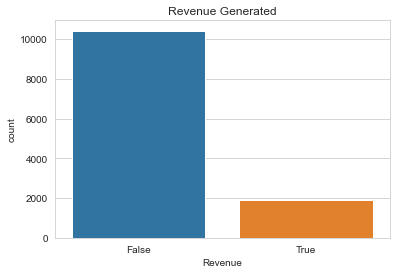

In [6]:
sns.countplot(data['Revenue'])
plt.title("Revenue Generated")
plt.show()

In [7]:
true = len(data[data['Revenue']==True])
false = len(data[data['Revenue']==False])
print("There is a class Imbalance of {} to {}% in favour of {}"
      .format(
              round(true/len(data)*100,2),
              round(false/len(data)*100,2),
              data['Revenue'].value_counts().index[0]))

There is a class Imbalance of 15.47 to 84.53% in favour of False


**Checking for missing entries**

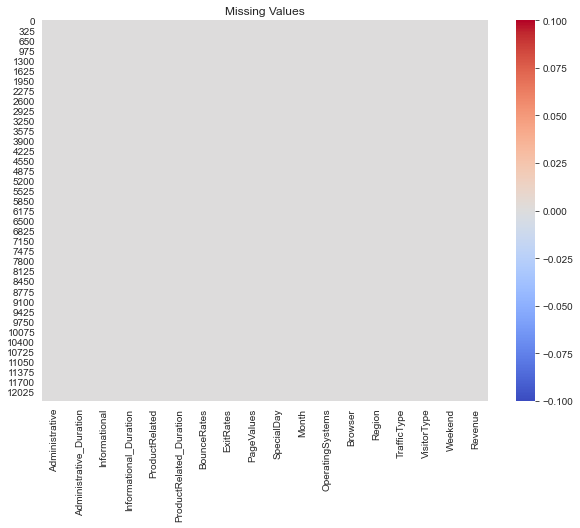

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isna(), cmap='coolwarm')
plt.title("Missing Values")
plt.show()

There are no missing entries in the data

**Data Analysis**

In [9]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
num = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cat = ['Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend']

Categorical

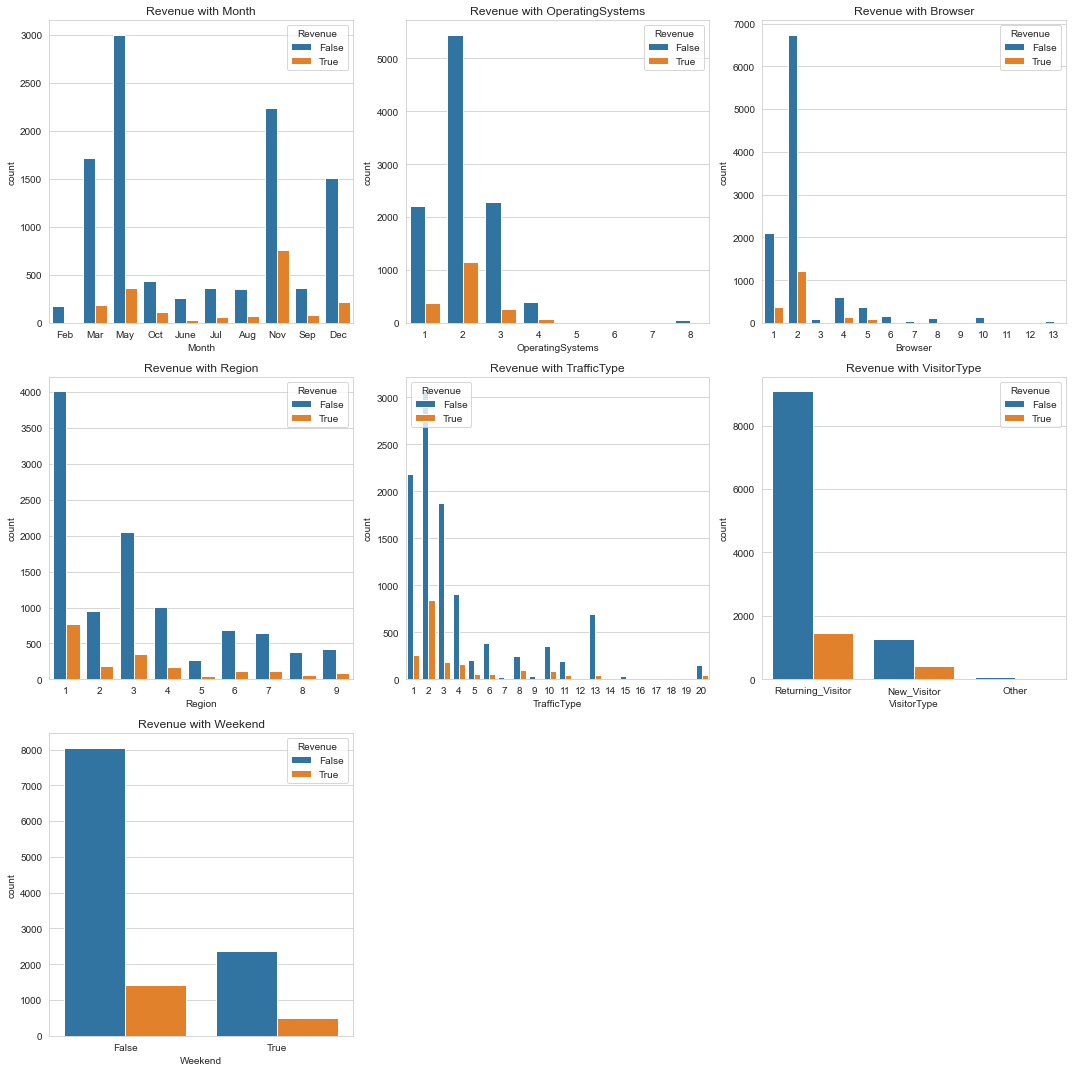

In [11]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(cat):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, data=data, hue='Revenue')
    plt.title("Revenue with {}".format(feature))
plt.tight_layout()
plt.show()

**Observations:**
1. More revenue is generated in the month of November while less revenue is generated in June
2. More customers are visited in the months of March, May, November and December
3. Most of the customers are the returning visitors and most revenue is generated by them.
4. Most of the revenue is generated during week days
5. Region 1 is generating more revenue
6. Most of the customers visited and purchased are having 2 Operating Systems

Numerical

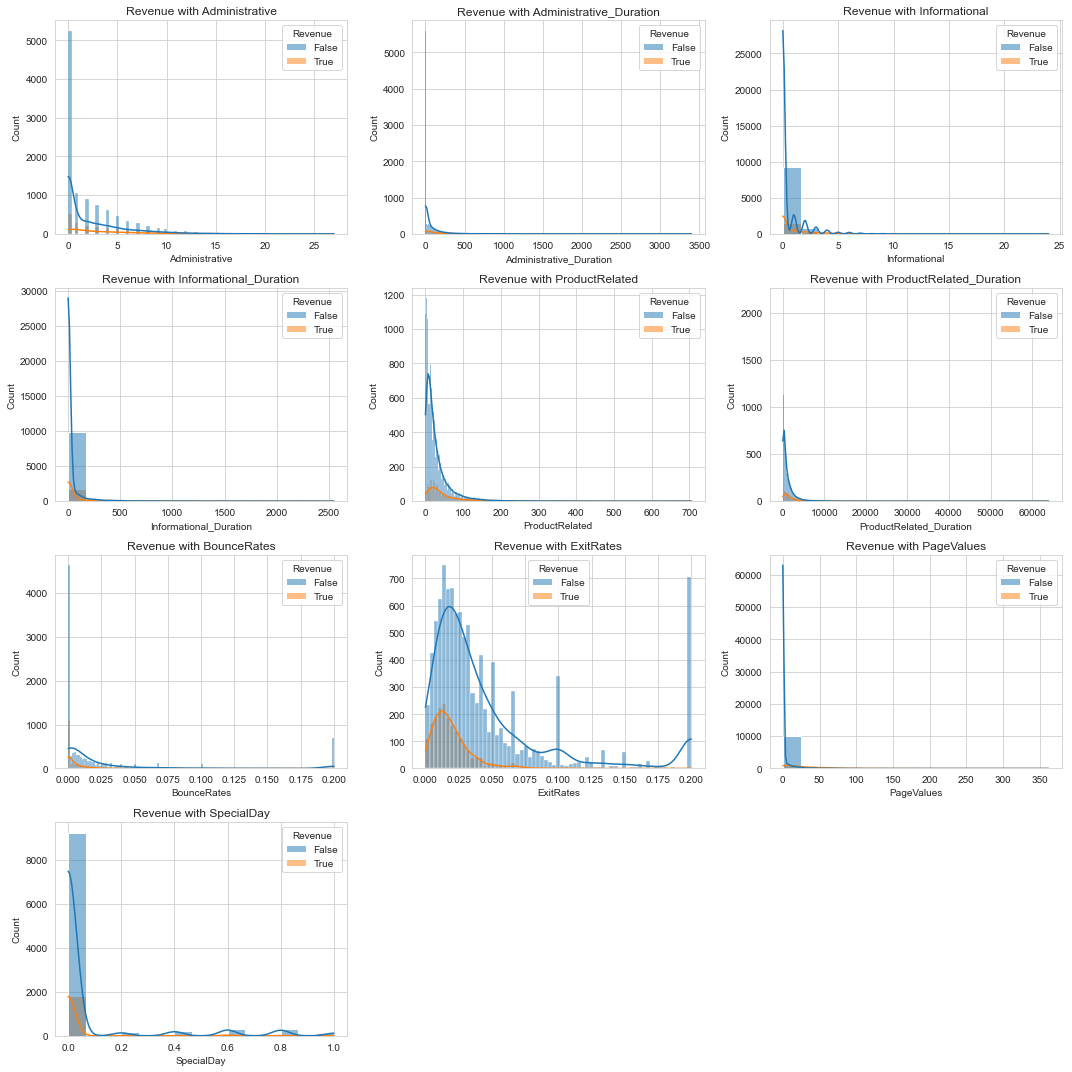

In [12]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(num):
    if feature!='Revenue':
        plt.subplot(4, 3, i+1)
        sns.histplot(x=feature, data=data, hue='Revenue', kde=True)
        plt.title("Revenue with {}".format(feature))
plt.tight_layout()
plt.show()

Most of the features have abnormal values that won't go well with the distributation and it's better to change those values to align the distrbution

**Handling Outliers:**

1. Administrative and duration

In [13]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['Administrative'], i)))
    i+=1

90 percentile value 7.0
91 percentile value 7.0
92 percentile value 8.0
93 percentile value 8.0
94 percentile value 9.0
95 percentile value 9.0
96 percentile value 10.0
97 percentile value 11.0
98 percentile value 12.0
99 percentile value 14.0
100 percentile value 27.0


There are few customers who visited more than 14 pages and we will replace them with median value

In [14]:
val = data['Administrative'].median()
data['Administrative'] = data['Administrative'].apply(lambda x : val if x>=14 else x)

Duration on Administrative pages

In [15]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['Administrative_Duration'], i)))
    i+=1

90 percentile value 224.88750000000005
91 percentile value 241.856875016
92 percentile value 261.11009526400005
93 percentile value 284.0
94 percentile value 313.92300001600006
95 percentile value 348.26636905999936
96 percentile value 398.05600002799997
97 percentile value 471.5164666709999
98 percentile value 594.1526666860002
99 percentile value 830.5870409259969
100 percentile value 3398.75


3398 is not a normal amount of time a person would spend on these pages. So we'll replace them with median value

In [16]:
val = data['Administrative_Duration'].median()
data['Administrative_Duration'] = data['Administrative_Duration'].apply(lambda x : val if x>=830 else x)

2. Informational and Duration

In [17]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['Informational'], i)))
    i+=1

90 percentile value 2.0
91 percentile value 2.0
92 percentile value 2.0
93 percentile value 2.0
94 percentile value 3.0
95 percentile value 3.0
96 percentile value 3.0
97 percentile value 4.0
98 percentile value 5.0
99 percentile value 6.0
100 percentile value 24.0


There are few customers who visited more than 6 pages and we will replace them with median value

In [18]:
val = data['Informational'].median()
data['Informational'] = data['Informational'].apply(lambda x : val if x>=6 else x)

Duration on Informational pages

In [19]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['Informational_Duration'], i)))
    i+=1

90 percentile value 72.0
91 percentile value 89.5
92 percentile value 105.98400000000001
93 percentile value 125.0
94 percentile value 154.9633333000001
95 percentile value 195.0
96 percentile value 245.96800000000002
97 percentile value 312.7824999999998
98 percentile value 433.26800000000003
99 percentile value 716.3899999999921
100 percentile value 2549.375


2549 is not a normal amount of time a person would spend on these pages. So we'll replace them with median value

In [20]:
val = data['Informational_Duration'].median()
data['Informational_Duration'] = data['Informational_Duration'].apply(lambda x : val if x>=430 else x)

3. Product related and Duration

In [21]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['ProductRelated'], i)))
    i+=1

90 percentile value 74.0
91 percentile value 80.0
92 percentile value 84.68000000000029
93 percentile value 91.0
94 percentile value 99.0
95 percentile value 109.0
96 percentile value 122.0
97 percentile value 138.0
98 percentile value 162.0
99 percentile value 221.0
100 percentile value 705.0


There are few customers who visited more than 221 pages and we will replace them with before percentile value

In [22]:
val = data['ProductRelated'].median()
data['ProductRelated'] = data['ProductRelated'].apply(lambda x : val if x>=162 else x)

Duration on Product related pages

In [23]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['ProductRelated_Duration'], i)))
    i+=1

90 percentile value 2877.863333300001
91 percentile value 3098.94358791
92 percentile value 3337.613799840002
93 percentile value 3608.8859881100007
94 percentile value 3919.7215535000014
95 percentile value 4300.289077449993
96 percentile value 4836.0770002
97 percentile value 5497.678789789994
98 percentile value 6683.4517829
99 percentile value 8701.142696919998
100 percentile value 63973.52223


5000 is not a normal amount of time a person would spend on these pages. So we'll replace them with before percentile values

In [24]:
val = data['ProductRelated_Duration'].median()
data['ProductRelated_Duration'] = data['ProductRelated_Duration'].apply(lambda x : val if x>=4000 else x)

4. Bounce and Exit Rates

In [25]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['BounceRates'], i)))
    i+=1

90 percentile value 0.058196969500000056
91 percentile value 0.066666667
92 percentile value 0.08
93 percentile value 0.1
94 percentile value 0.142857143
95 percentile value 0.2
96 percentile value 0.2
97 percentile value 0.2
98 percentile value 0.2
99 percentile value 0.2
100 percentile value 0.2


There are more points that are more than 0.1 and we'll replace them with the median value

In [26]:
val = data['BounceRates'].median()
data['BounceRates'] = data['BounceRates'].apply(lambda x : val if x>=0.1 else x)

exit rates

In [27]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['ExitRates'], i)))
    i+=1

90 percentile value 0.1
91 percentile value 0.10094155665000021
92 percentile value 0.12222222200000002
93 percentile value 0.14237651473000187
94 percentile value 0.16944642846000058
95 percentile value 0.2
96 percentile value 0.2
97 percentile value 0.2
98 percentile value 0.2
99 percentile value 0.2
100 percentile value 0.2


There are more points that are more than 0.16 and we'll replace them with the median value

In [28]:
val = data['ExitRates'].median()
data['ExitRates'] = data['ExitRates'].apply(lambda x : val if x>=0.16 else x)

5. Page value

In [29]:
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['PageValues'], i)))
    i+=1

90 percentile value 18.855502398000006
91 percentile value 21.2112655
92 percentile value 24.323797857200017
93 percentile value 28.050553845000014
94 percentile value 32.83145658880001
95 percentile value 38.16052827749995
96 percentile value 44.6038616144
97 percentile value 53.11700328179998
98 percentile value 62.80135189440001
99 percentile value 85.49849043159924
100 percentile value 361.7637419


There are more points that are more than 85 and we'll replace them with the median value

In [30]:
val = data['PageValues'].median()
data['PageValues'] = data['PageValues'].apply(lambda x : val if x>=85 else x)

6. Special day

In [31]:
i = 80
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(data['SpecialDay'], i)))
    i+=1

80 percentile value 0.0
81 percentile value 0.0
82 percentile value 0.0
83 percentile value 0.0
84 percentile value 0.0
85 percentile value 0.0
86 percentile value 0.0
87 percentile value 0.0
88 percentile value 0.0
89 percentile value 0.0
90 percentile value 0.2
91 percentile value 0.2
92 percentile value 0.4
93 percentile value 0.4
94 percentile value 0.6
95 percentile value 0.6
96 percentile value 0.6
97 percentile value 0.8
98 percentile value 0.8
99 percentile value 1.0
100 percentile value 1.0


90% of the data is 0, so it makes sense to convert this feature into a categorical on having close=1 and not close=0

In [32]:
data['SpecialDay'] = np.where(data['SpecialDay']==0, 0, 1)

Distribution

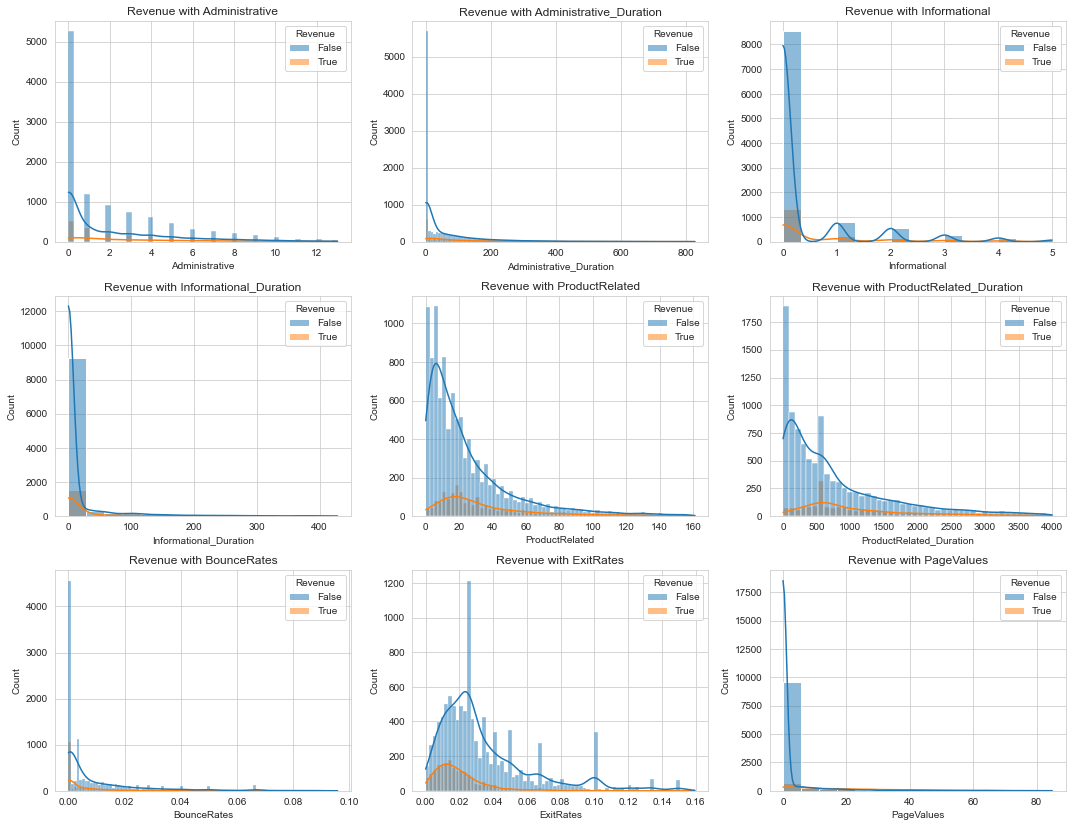

In [33]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(num):
    if feature!='SpecialDay':
        plt.subplot(4, 3, i+1)
        sns.histplot(x=feature, data=data, hue='Revenue', kde=True)
        plt.title("Revenue with {}".format(feature))
plt.tight_layout()
plt.show()

**Observations:**
1. The more number of pages visited by the customer about "account managment" less likely to make a purchase
2. More amount of time spent on administrative pages less likely to make a purchase
3. Most of the people are not visiting more of informational pages
4. More amount of time spent on informational pages less likely to make a purchase

**Checking Correlation**

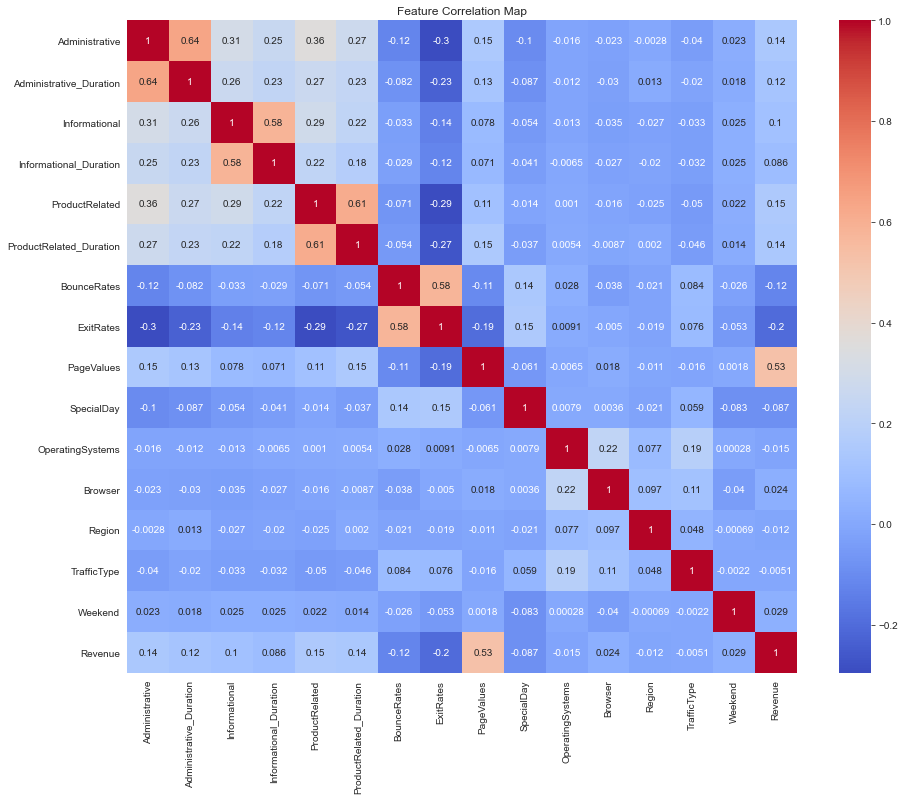

In [34]:
data['Revenue'] = np.where(data['Revenue']==True, 1, 0)
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Map")
plt.show()

Features like "Informational and duration", "Special day", "Operating systems", "Region", "Traffic Type", "Browser", "Weekend" are not correlated with the prediction of Revenue. So it's better to drop these redundant features

In [35]:
redundant_columns = ['Informational', 'Informational_Duration', 'SpecialDay', 'OperatingSystems',
                     'Browser', 'Region', 'TrafficType',  'Weekend']

In [36]:
cleaned_data = data.drop(redundant_columns, axis=1)
cleaned_data.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Revenue
0,0.0,0.0,1.0,0.000000,0.003112,0.025156,0.0,Feb,Returning_Visitor,0
1,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,Feb,Returning_Visitor,0
2,0.0,0.0,1.0,0.000000,0.003112,0.025156,0.0,Feb,Returning_Visitor,0
3,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,Feb,Returning_Visitor,0
4,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,Feb,Returning_Visitor,0


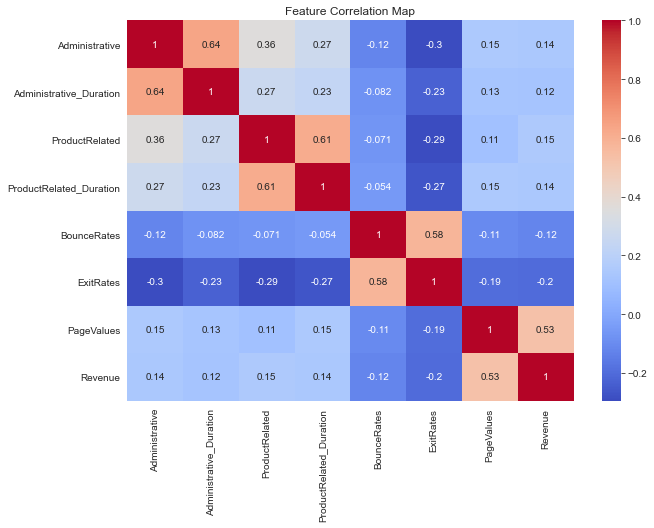

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Map")
plt.show()

**Data Preprocessing**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

In [39]:
x = cleaned_data.drop("Revenue", axis=1)
y = cleaned_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Encoding Categorical Features

In [40]:
vectorizer = CountVectorizer()

#Month
vectorizer.fit(X_train['Month'])
X_train_month = vectorizer.transform(X_train['Month'].values)
X_test_month = vectorizer.transform(X_test['Month'].values)

#Visitor type
vectorizer.fit(X_train['VisitorType'])
X_train_vis = vectorizer.transform(X_train['VisitorType'].values)
X_test_vis = vectorizer.transform(X_test['VisitorType'].values)

Encoding Numerical Features

In [41]:
norm = Normalizer()

num = cleaned_data.select_dtypes(include='number').columns
for feature in num:
    if feature=='Revenue':
        continue
    X_train[feature] = norm.fit_transform(X_train[feature].values.reshape(1,-1)).T
    X_test[feature] = norm.fit_transform(X_test[feature].values.reshape(1,-1)).T

In [42]:
X_train_final = np.hstack((X_train.select_dtypes(include='number').values,
                           X_train_vis.toarray(), X_train_month.toarray()))
X_test_final = np.hstack((X_test.select_dtypes(include='number').values,
                          X_test_vis.toarray(), X_test_month.toarray()))

In [43]:
print("Train before vectorization: ", X_train.shape)
print("Test before vectorization: ", X_test.shape)
print("Train after vectorization: ", X_train_final.shape)
print("Test after vectorization: ", X_test_final.shape)

Train before vectorization:  (8261, 9)
Test before vectorization:  (4069, 9)
Train after vectorization:  (8261, 20)
Test after vectorization:  (4069, 20)


**Building Models**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Since the number of featues are less first we'll try with Decision tree based models 

<h3>1. Decision Tree

In [45]:
classifier = DecisionTreeClassifier(class_weight = 'balanced')
#best depth in range [1, 5, 10, 50], and the best min_samples_split in range [5, 10, 100, 500]
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split':  [5, 10, 100, 500]}
clf_dt = GridSearchCV(classifier, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf_dt.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [46]:
results = pd.DataFrame.from_dict(clf_dt.cv_results_)
results.sort_values('rank_test_score')[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
11,0.012655,0.000488,0.001329,4.692923e-04,10,500,"{'max_depth': 10, 'min_samples_split': 500}",0.883563,0.911390,0.892144,0.895699,0.011635,1,0.911857,0.908089,0.910925,0.910290,0.001602
15,0.011968,0.000814,0.001995,2.973602e-07,50,500,"{'max_depth': 50, 'min_samples_split': 500}",0.883563,0.908122,0.892144,0.894610,0.010177,2,0.911857,0.908934,0.910925,0.910572,0.001219
7,0.013288,0.002032,0.002991,3.591259e-06,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.881500,0.907669,0.889514,0.892894,0.010948,3,0.908512,0.901493,0.906440,0.905482,0.002945


In [47]:
#Extracting required features for the plotting
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_depth = results['param_max_depth']
min_sample_split = results['param_min_samples_split']
best_max_depth = clf_dt.best_params_['max_depth']
best_min_sample_split = clf_dt.best_params_['min_samples_split']

print("The best value for maximum depth of the tree is: ", best_max_depth)
print("The best value for min no. of sample at any node is: ", best_min_sample_split)

The best value for maximum depth of the tree is:  10
The best value for min no. of sample at any node is:  500


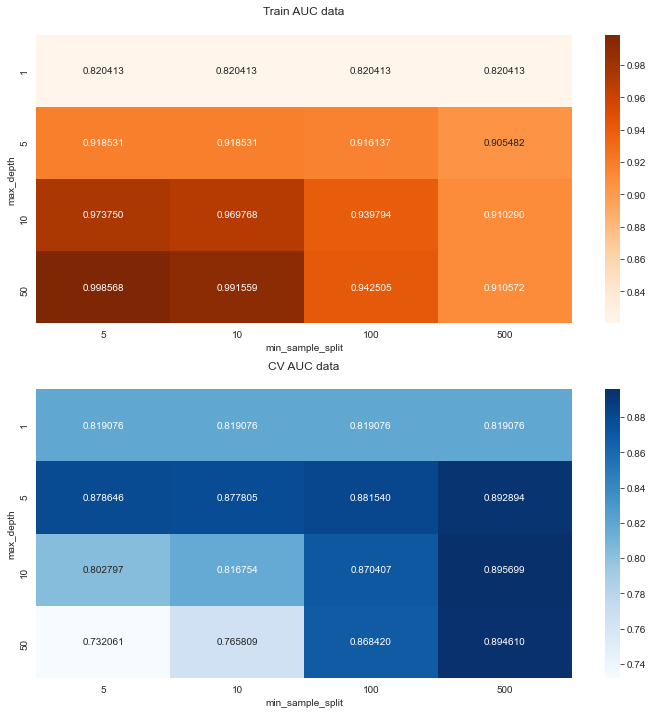

In [48]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
plt.rcParams['figure.figsize']=(7,7)

#For Train results
data = pd.DataFrame({'X': max_depth, 'Y': min_sample_split, 'Z': train_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[0] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('min_sample_split');
ax[0].set_ylabel('max_depth'); 
ax[0].set_title('Train AUC data', y=1.05);
ax[0].xaxis.set_ticklabels([5, 10, 100, 500]); 
ax[0].yaxis.set_ticklabels([1, 5, 10, 50]);

#For Cross validation results
data = pd.DataFrame({'X': max_depth, 'Y': min_sample_split, 'Z': cv_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[1] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('min_sample_split');
ax[1].set_ylabel('max_depth'); 
ax[1].set_title('CV AUC data', y=1.05);
ax[1].xaxis.set_ticklabels([5, 10, 100, 500]); 
ax[1].yaxis.set_ticklabels([1, 5, 10, 50]);

plt.tight_layout()

Defining the best model

In [49]:
#Defining the best model with tuned hyperparameters
clf_best_DT = DecisionTreeClassifier(max_depth = best_max_depth, min_samples_split = best_min_sample_split,  class_weight = 'balanced')
clf_best_DT.fit(X_train_final, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

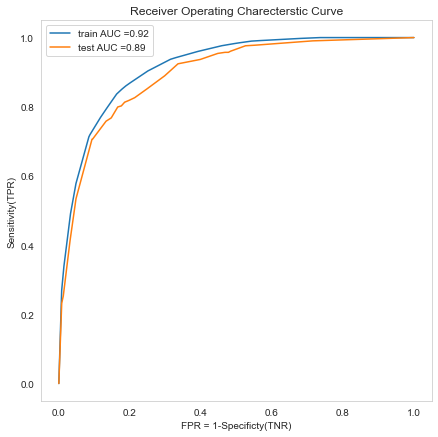

In [50]:
#Plotting ROC curve on both train and test data

#Checking the performance of the model on test data using AUC as our metric
y_train_pred = clf_best_DT.predict_proba(X_train_final)[:,1]
y_test_pred = clf_best_DT.predict_proba(X_test_final)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
dt_auc = round(auc(test_fpr, test_tpr),2)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve")
plt.grid()
plt.show()

In [51]:
def find_best_threshold(threshould, fpr, tpr):
    '''Function is to find the best threshold value i.e, threshold for which the value of TPR and TNR are maximum'''
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("="*100)
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.7005401278747972 for threshold 0.578


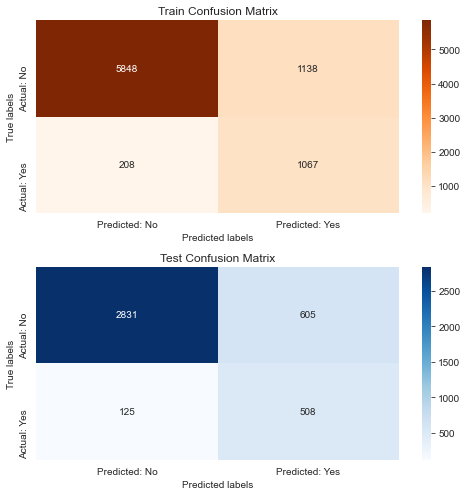

In [52]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

### 2. Linear SVC()

In [53]:
classifier_svm = LinearSVC()
parameters = {'C': np.logspace(-10, 1, num=400, endpoint=True, base=10.0, dtype=None, axis=0)}
clf_svm = RandomizedSearchCV(classifier_svm, parameters, cv = 5, scoring = "roc_auc", return_train_score = True)
clf_svm.fit(X_train_final,y_train)

RandomizedSearchCV(cv=5, estimator=LinearSVC(),
                   param_distributions={'C': array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.94219653e-10, 3....
       2.32228110e+00, 2.47447864e+00, 2.63665090e+00, 2.80945159e+00,
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01])},
                   return_train_score=True, scoring='roc_auc')

In [54]:
results_svm = pd.DataFrame.from_dict(clf_svm.cv_results_)
best_c_svm = (clf_svm.best_params_)["C"]
print("The best hyperparameter value is: ", best_c_svm)

The best hyperparameter value is:  5.300426015879662


In [55]:
#Sorting based on the parameter
results_svm = results_svm.sort_values(['param_C'])
results_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,0.003196,0.000404,0.001955,0.000209,0.0,{'C': 1.740209374062485e-09},0.596421,0.542218,0.583351,0.546111,...,0.577828,0.030057,10,0.585948,0.555597,0.587882,0.598149,0.578654,0.581246,0.014258
9,0.004595,0.000792,0.001396,0.000488,0.0,{'C': 2.71383825371428e-09},0.596423,0.542215,0.583354,0.546117,...,0.577830,0.030059,9,0.585950,0.555597,0.587883,0.598149,0.578655,0.581247,0.014258
0,0.004792,0.000754,0.002147,0.000503,0.0,{'C': 4.94578905312064e-07},0.596642,0.542819,0.583682,0.546460,...,0.578175,0.029949,8,0.586280,0.556112,0.588159,0.598436,0.578968,0.581591,0.014177
3,0.004595,0.000804,0.002072,0.000481,0.000002,{'C': 1.8757845627201612e-06},0.597344,0.590172,0.584651,0.547523,...,0.588375,0.024123,7,0.587121,0.588906,0.588968,0.599266,0.579812,0.588814,0.006216
4,0.005186,0.000399,0.002117,0.000112,0.000024,{'C': 2.376511113811073e-05},0.632489,0.631816,0.620703,0.586989,...,0.625780,0.022718,6,0.625539,0.626168,0.626579,0.638097,0.617545,0.626786,0.006562


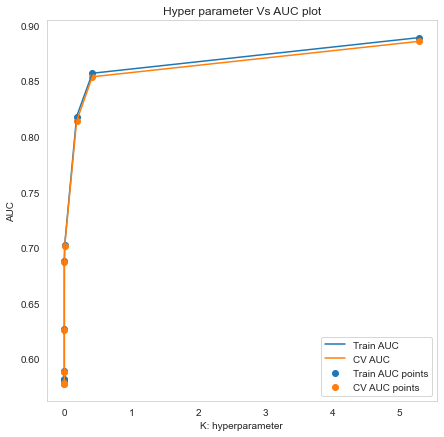

In [56]:
train_auc_svm = results_svm['mean_train_score']
cv_auc_svm = results_svm['mean_test_score'] 
C_svm =  results_svm['param_C']

plt.plot(C_svm, train_auc_svm, label='Train AUC')
plt.plot(C_svm, cv_auc_svm, label='CV AUC')
plt.scatter(C_svm, train_auc_svm, label='Train AUC points')
plt.scatter(C_svm, cv_auc_svm, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

Defining the best model

In [57]:
base_model_SVM = LinearSVC(C = best_c_svm, class_weight='balanced') 
calibrated_SVM = CalibratedClassifierCV(base_estimator = base_model_SVM)
calibrated_SVM.fit(X_train_final, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=5.300426015879662,
                                                class_weight='balanced'))

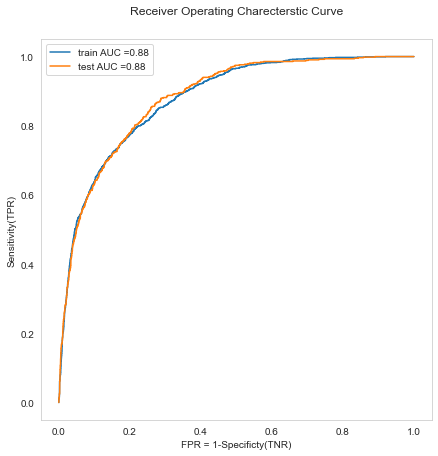

In [58]:
#Checking the performance of the model on test data using AUC as our metric
y_train_pred_svm = calibrated_SVM.predict_proba(X_train_final)[:,1]
y_test_pred_svm = calibrated_SVM.predict_proba(X_test_final)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr_svm, train_tpr_svm, tr_thresholds_svm = roc_curve(y_train, y_train_pred_svm)
test_fpr_svm, test_tpr_svm, te_thresholds_svm = roc_curve(y_test, y_test_pred_svm)
svm_auc = round(auc(test_fpr_svm, test_tpr_svm),2)

#Plotting the ROC curve 
plt.plot(train_fpr_svm, train_tpr_svm, label="train AUC ="+str(round(auc(train_fpr_svm, train_tpr_svm),2)))
plt.plot(test_fpr_svm, test_tpr_svm, label="test AUC ="+str(round(auc(test_fpr_svm, test_tpr_svm),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve", y=1.05)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6222560527216898 for threshold 0.144


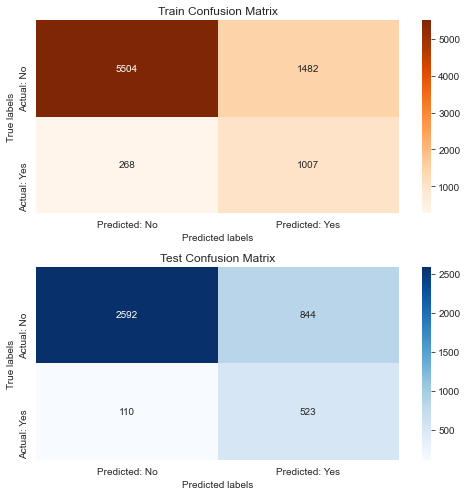

In [59]:
best_t_svm = find_best_threshold(tr_thresholds_svm, train_fpr_svm, train_tpr_svm)

train_confusion_matrix_svm = confusion_matrix(y_train, predict_with_best_t(y_train_pred_svm, best_t_svm))
test_confusion_matrix_svm = confusion_matrix(y_test, predict_with_best_t(y_test_pred_svm, best_t_svm))

#https://stackoverflow.com/questions/56478320/how-to-create-multiple-seaborn-heatmaps-with-a-shared-legend-in-one-figure
fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix_svm, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix_svm, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

### GBDT

In [60]:
clf = GradientBoostingClassifier()
parameters = {'n_estimators': [1, 10, 50, 100], 'learning_rate':  [0.2, 0.4, 0.6, 0.8]}
clf_gbdt = RandomizedSearchCV(clf, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf_gbdt.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8],
                                        'n_estimators': [1, 10, 50, 100]},
                   return_train_score=True, scoring='roc_auc')

In [61]:
results = pd.DataFrame.from_dict(clf_gbdt.cv_results_)
results.sort_values('rank_test_score')[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.341757,0.002050,0.003653,0.000468,50,0.2,"{'n_estimators': 50, 'learning_rate': 0.2}",0.895398,0.911630,0.905991,0.904340,0.006729,1,0.941799,0.935596,0.940188,0.939194,0.002628
5,0.072474,0.003419,0.001993,0.000001,10,0.4,"{'n_estimators': 10, 'learning_rate': 0.4}",0.895068,0.911986,0.900689,0.902581,0.007035,2,0.923970,0.921934,0.921966,0.922623,0.000952
3,0.721108,0.023106,0.004987,0.000002,100,0.2,"{'n_estimators': 100, 'learning_rate': 0.2}",0.894998,0.909036,0.903083,0.902372,0.005753,3,0.957373,0.954108,0.957513,0.956331,0.001573


In [62]:
#Extracting required parameters for the plotting
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
n_estimators = results['param_n_estimators']
learning_rate = results['param_learning_rate']
best_n_estimators = clf_gbdt.best_params_['n_estimators']
best_learning_rate = clf_gbdt.best_params_['learning_rate']

print("The best value for n_estimators of the model is: ", best_n_estimators)
print("The best value for learning rate of the model is: ", best_learning_rate)

The best value for n_estimators of the model is:  50
The best value for learning rate of the model is:  0.2


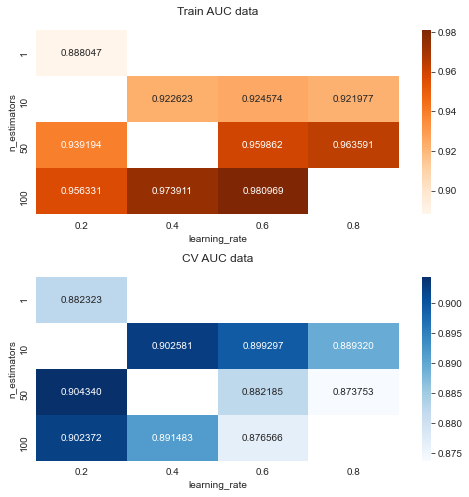

In [63]:
fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

#For Train results
data = pd.DataFrame({'X': n_estimators, 'Y': learning_rate, 'Z': train_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[0] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('learning_rate');
ax[0].set_ylabel('n_estimators'); 
ax[0].set_title('Train AUC data', y=1.05);


#For Cross validation results
data = pd.DataFrame({'X': n_estimators, 'Y': learning_rate, 'Z': cv_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[1] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('learning_rate');
ax[1].set_ylabel('n_estimators'); 
ax[1].set_title('CV AUC data', y=1.05);

plt.tight_layout()

In [64]:
#Defining the best model with tuned hyperparameters
best_clf_gbdt = GradientBoostingClassifier(n_estimators = best_n_estimators, learning_rate = best_learning_rate)
best_clf_gbdt.fit(X_train_final, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)

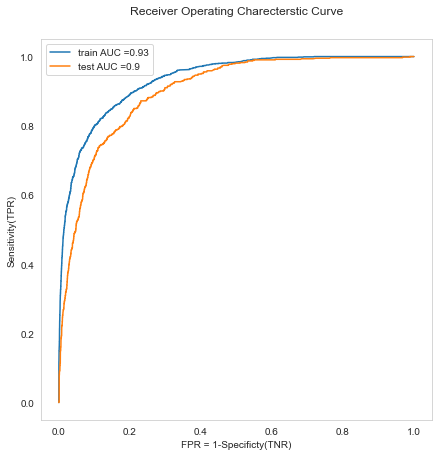

In [65]:
#Checking the performance of the model on test data using AUC as our metric
y_train_pred = best_clf_gbdt.predict_proba(X_train_final)[:,1]
y_test_pred = best_clf_gbdt.predict_proba(X_test_final)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
gbdt_auc = round(auc(test_fpr, test_tpr),2)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve", y=1.05)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.7266546538455062 for threshold 0.164


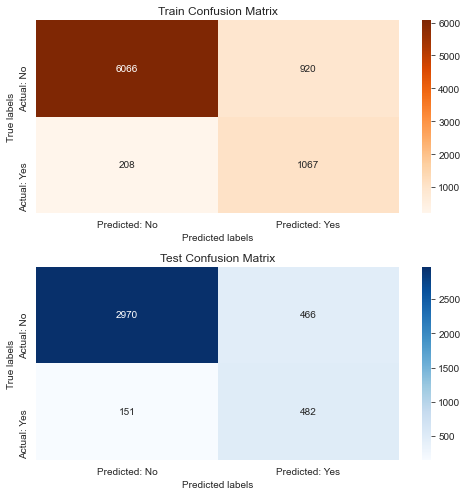

In [66]:
best_t_gbdt = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t_gbdt))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t_gbdt))

#https://stackoverflow.com/questions/56478320/how-to-create-multiple-seaborn-heatmaps-with-a-shared-legend-in-one-figure
fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

### Summary

In [67]:
from prettytable import PrettyTable

summary = PrettyTable()
summary.field_names = ["Model", "Hyper Parameter", "AUC"]
summary.add_row(["Decision Tree", str(best_max_depth)+'-'+str(best_min_sample_split), dt_auc])
summary.add_row(["LinearSVC", round(best_c_svm,3), svm_auc])
summary.add_row(["GradientBoostingClassifier", str(best_n_estimators)+'-'+str(best_learning_rate), gbdt_auc])
print(summary)

+----------------------------+-----------------+------+
|           Model            | Hyper Parameter | AUC  |
+----------------------------+-----------------+------+
|       Decision Tree        |      10-500     | 0.89 |
|         LinearSVC          |       5.3       | 0.88 |
| GradientBoostingClassifier |      50-0.2     | 0.9  |
+----------------------------+-----------------+------+
